In [14]:
import numpy as np
import rebound
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from scipy import signal

sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd
import proper_elements
import tools

In [136]:
#set up the FFT frequency array
dt = t[1]-t[0]
n = len(t)
freq = np.fft.rfftfreq(n,d=dt)
print(1/freq)

[           inf 1.00010800e+07 5.00054000e+06 ... 2.00101641e+03
 2.00061612e+03 2.00021600e+03]


/var/folders/5_/84prsk014w94mtw9hx5gyjx40000gn/T/ipykernel_48070/2135819259.py:5: RuntimeWarning: divide by zero encountered in true_divide
  print(1/freq)


In [137]:
Yp = np.fft.rfft(p)
Yq = np.fft.rfft(q)


In [10]:
filtered_f = np.array(freq2)

/var/folders/5_/84prsk014w94mtw9hx5gyjx40000gn/T/ipykernel_48070/1130230485.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(1/freq,Yp**2.)#,s=1.5)
/var/folders/5_/84prsk014w94mtw9hx5gyjx40000gn/T/ipykernel_48070/1130230485.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(1/freq,Yp_f**2.,s=2.5)


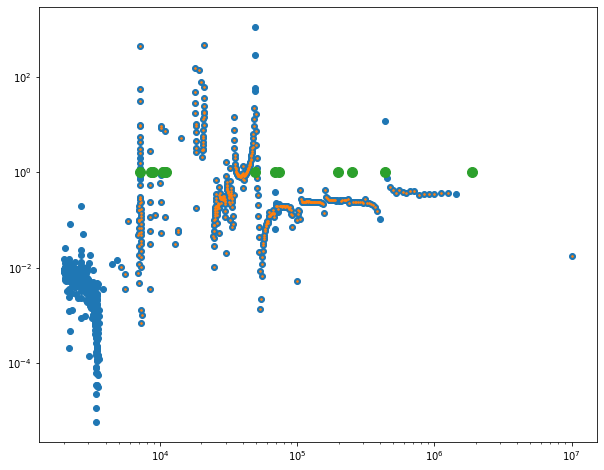

In [138]:
f = plt.figure(figsize=(10,8))
plt.scatter(1/freq,Yp**2.)#,s=1.5)
plt.scatter(1/freq,Yp_f**2.,s=2.5)
plt.yscale('log')
plt.xscale('log')
plt.scatter(1/filtered_f,(np.ones(len(filtered_f))),s=100)

In [226]:
#sos = signal.butter(4, [0.9*filt_freq[0],1.1*filt_freq[0]], 'bandstop', fs=dt,output='sos')
#filtered = signal.sosfilt(sos, p)
Yp = np.fft.rfft(p)
Yq = np.fft.rfft(q)
Yp[0] = 0.
Yq[0] = 0.
pt = np.fft.irfft(Yp)
qt = np.fft.irfft(Yq)
tt = t[1::]

print(len(tt))
print(len(p))
print(len(pt))
print(p)
print(pt)

sos = signal.butter(4, 1/5000., 'lowpass', fs=1./dt,output='sos')
filtered_p = signal.sosfilt(sos, pt)
filtered_q = signal.sosfilt(sos, qt)


Yp = np.fft.rfft(filtered_p)
sind = np.argmax(np.abs(Yp[1:]))+1
s = freq[sind]
print(1./s)


import hard_coded_constants as const

z1 = abs(g+s-const.g6-const.s6)
z2 = abs(g+s-const.g5-const.s7)
z3 = abs(g+s-const.g5-const.s6)
z4 = abs(g-2.*const.g6+const.g5)
z5 = abs(g-2.*const.g6+const.g7)
z6 = abs(s-const.s6-const.g5+const.g6)
z7 = abs(g-3.*const.g6+2.*const.g5)
z8 = abs(2.*(g-const.g6)+s-const.s6)
z9 = abs(3.*(g-const.g6)+s-const.s6)


filt_freq = [np.abs(const.s1),np.abs(const.s2),np.abs(const.s3),np.abs(const.s4),np.abs(const.s6),np.abs(const.s7),np.abs(const.s8),z1,z2,z3,z6,z8,z9]
filt_freq = np.array(filt_freq)
#print(filt_freq)
print(1./filt_freq)

print(1./s)



secresind1 = []

for f in filt_freq:
    try:
        secresind1.append(np.where(freq>=f)[0][0])
    except:
        continue
print(secresind1)

print(secresind1)

for i in secresind1:
    sos = signal.butter(1, [freq[i-5],freq[i+5]], 'bandstop', fs=1./dt,output='sos')
    filtered_p = signal.sosfilt(sos, filtered_p)
    filtered_q = signal.sosfilt(sos, filtered_q)
    
#print(p)
##print(filtered-p)
#print(dt)

10000
10001
10000
[ 0.09561834  0.12844213  0.14988959 ... -0.02843753 -0.06971294
 -0.09836113]
[ 0.06962713  0.10247003  0.12391402 ... -0.05441971 -0.0957018
 -0.12436462]
19381.93799995592
[ 249156.98043272  197236.25738114   69143.63790501   73497.2617166
   49193.46341217  433059.41779378 1871442.68852612   10579.41927356
   10524.79997176    8847.01817432   11058.07911132    8537.96256296
    7156.9268099 ]
19381.93799995592
[41, 51, 145, 137, 204, 24, 6, 946, 951, 1131, 905, 1172, 1398]
[41, 51, 145, 137, 204, 24, 6, 946, 951, 1131, 905, 1172, 1398]


In [240]:
sos = signal.butter(1, [1/20000,1/19000], 'bandpass', fs=1./dt,output='sos')
p_prop = signal.sosfilt(sos, p)
q_prop = signal.sosfilt(sos, q)
sini_prop = np.sqrt(p_prop*p_prop+q_prop*q_prop)
node_prop = np.arctan2(p_prop/sini_prop,q_prop/sini_prop)


10000


/var/folders/5_/84prsk014w94mtw9hx5gyjx40000gn/T/ipykernel_48070/1122045004.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(1./freq,Yp**2.,s=4.5,color='red')


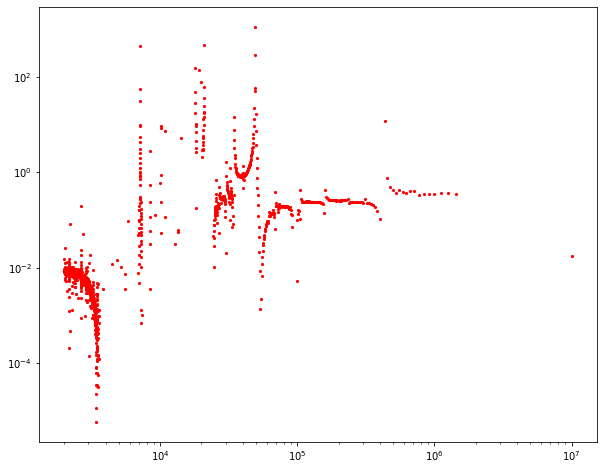

In [248]:
Yp2 = np.fft.rfft(filtered_p)
Yp = np.fft.rfft(p)
Yp3 = np.fft.rfft(p_prop)

print(len(filtered_p))
f = plt.figure(figsize=(10,8))

#plt.scatter(1./freq,Yp2,s=1.5)
plt.scatter(1./freq,Yp**2.,s=4.5,color='red')
#plt.scatter(1./freq,Yp3,s=4.5,color='k')

#plt.scatter(1/freq,Yp2**2.-Yp**2.,s=2.5)
plt.yscale('log')
plt.xscale('log')
#plt.scatter(1./filt_freq,(np.ones(len(filt_freq))),s=100)

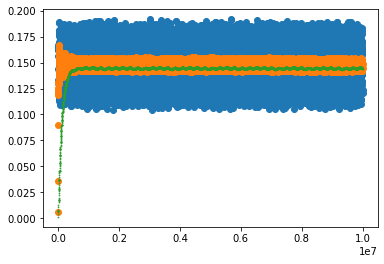

In [239]:
sini = np.sqrt(p*p+q*q)
node = np.arctan2(p/sini,q/sini)
fsini = np.sqrt(filtered_p*filtered_p+filtered_q*filtered_q)
fnode = np.arctan2(filtered_p/fsini,filtered_q/fsini)
plt.scatter(t,sini)
plt.scatter(tt,fsini)
plt.scatter(t,sini_prop,s=0.5)

#plt.xlim([1e5,2e5])

In [245]:
print(ap)

2.777427762844739


[ 2.51852743  2.42955172  2.29203935 ... -0.0855823  -0.4106432
 -0.73523059]


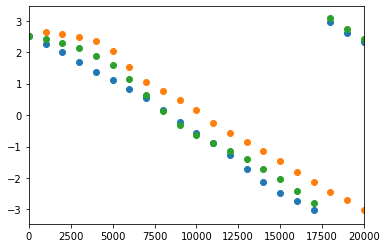

In [244]:
plt.scatter(t,node)
plt.scatter(tt,fnode)
plt.scatter(t,node_prop)

plt.xlim([0e5,2e4])
print(node_prop)

In [230]:
#flag, epoch, sim = sbd.initialize_simulation(des='28', clones=0)

In [ ]:
#sim.status()

In [ ]:
#max time in the integration (years)
tmax = 10e6

#how often you want to save the simulation archive file
tout = 1e3
savefile = "28-archive.bin"

#run the simulation, deleting any existing simulation archive
#flag, sim = sbd.run_simulation(sim, tmax=tmax, tout=tout,archivefile=savefile,deletefile=True)

In [31]:
import hard_coded_constants as const

z1 = abs(g+s-const.g6-const.s6)
z2 = abs(g+s-const.g5-const.s7)
z3 = abs(g+s-const.g5-const.s6)
z4 = abs(g-2.*const.g6+const.g5)
z5 = abs(g-2.*const.g6+const.g7)
z6 = abs(s-const.s6-const.g5+const.g6)
z7 = abs(g-3.*const.g6+2.*const.g5)
z8 = abs(2.*(g-const.g6)+s-const.s6)
z9 = abs(3.*(g-const.g6)+s-const.s6)


filt_freq = [np.abs(const.s1),np.abs(const.s2),np.abs(const.s3),np.abs(const.s4),np.abs(const.s6),np.abs(const.s7),np.abs(const.s8),z1,z2,z3,z6,z8,z9]
filt_freq = np.array(filt_freq)
print(filt_freq)
print(1./filt_freq)

[4.01353395e-06 5.07006173e-06 1.44626466e-05 1.36059491e-05
 2.03279040e-05 2.30915195e-06 5.34347114e-07 9.45231467e-05
 9.50136822e-05 1.13032434e-04 9.04316193e-05 1.17123962e-04
 1.39724777e-04]
[ 249156.98043272  197236.25738114   69143.63790501   73497.2617166
   49193.46341217  433059.41779378 1871442.68852612   10579.41927356
   10524.79997176    8847.01817432   11058.07911132    8537.96256296
    7156.9268099 ]


In [142]:
flag, ap,ep,ip,g,s,g2,s2, sini_f, ecc_f, node_f, lperi_f, p_f, q_f, Yp_f,freq2 = proper_elements.calc_proper_elements(sbody='28',nclones=0,archivefile="28-archive.bin")

2
4
444
516
[43, 57, 134, 139, 33, 218, 24, 6, 946, 951, 1131, 41, 32, 145, 1172, 1398]
[41, 51, 145, 137, 204, 24, 6, 946, 951, 1131, 905, 1172, 1398]


In [ ]:
print(ap,ep,ip)
print(g*360*60*60,s*360*60*60)
print(g2*360*60*60,s2*360*60*60)

for f in freq2:
    print(1/f)

In [ ]:
print(np.mean(e))
print(np.mean(np.sin(inc)))

In [4]:
lperi = node+aperi
lperi = tools.arraymod2pi(lperi)

lperi_f = tools.arraymod2pi(lperi_f)

In [133]:

flag, a, e, inc, node, aperi, ma, t = tools.read_sa_for_sbody(sbody='28', 
                        nclones=0,archivefile="28-archive.bin",center='helio')


/Users/kvolk/opt/anaconda3/envs/sbdynt/lib/python3.9/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [134]:
p = np.sin(inc)*np.sin(node)
q = np.sin(inc)*np.cos(node)

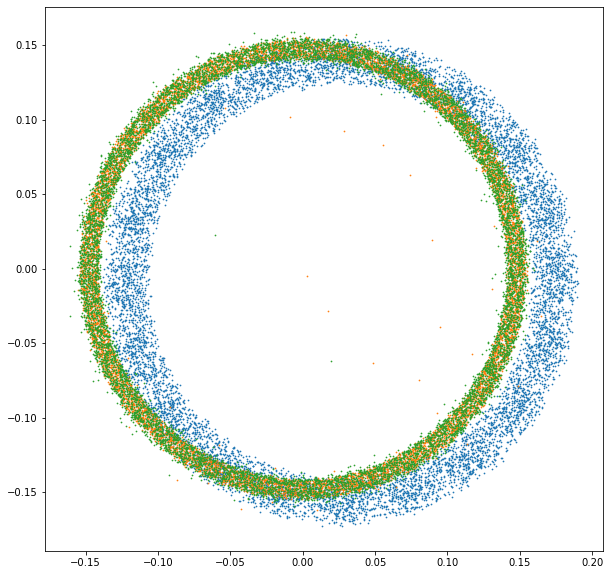

In [213]:
f = plt.figure(figsize=(10,10))
plt.scatter(p,q,s=0.5)
plt.scatter(filtered_p,filtered_q,s=0.5)

plt.scatter(p_f,q_f,s=0.5)


(0.0, 500000.0)

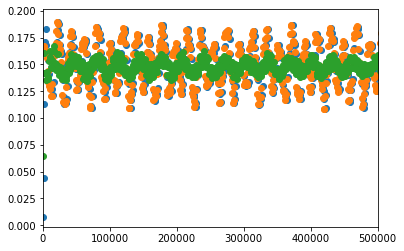

In [146]:
plt.scatter(t,fsini)

plt.scatter(t,np.sin(inc))
plt.scatter(t,sini_f)
plt.xlim([0,0.5e6])

In [ ]:
f = plt.figure(figsize=(10,5))

plt.scatter(t,lperi)
plt.scatter(t,lperi_f)
plt.xlim([0,0.1e6])

# Running a Single Object and Producing Proper Elements

# Initializing your data

SBDynT allows you to start an integration by producing a Rebound SimulationArchive with all of the particles needed for the simulation. You do so with the "make_files.py" script.

The make function in this script takes 4 inputs,
- (str) obj_directory: The name of the destination folder with the archive file.
- (boolean) rocky_planets: If True, will include all 8 planets in integration, otherwise will just use gas giants. The default is False.
- (str) des: The name/designation of the object in question according to JPL Horizons naming coventions in the Small Body Database.
- (int) clones: The number of clones you want to include in the run. Defualt is set to 0.

This will produce a small archive.bin file contianing the particles representing the Sun, 8 planets, and the primary object, plus any clones you include in the run.

In [ ]:
make_files.make('Haumea',True)

# Integrating A Single or Multiple Simulations

The integrate.py script can take the produced archive.bin from make_file, and can then run Rebound integrations for a specified amount of time on the files. You do so with the integrate function, with the following inputs:
- (str) objname: The name of the object you are running, or if you are running a list of multiple objects, it will be the integer index of the object in the file list.
- (float) tmax: The number of years to run the integration for. Default is set to 10 Myr.
- (float) tout: The desired increment of years to save in your archive.bin. Default is set to save data once every 1000 years. 
- (str) filename: The name of the file containing the list of object names you are integrating. If you are only running a single object, this string can be left alone, since the defualt is the "Single" filename.

Below, I run the Haumea system, which I initizalied above, for a 100,000 year period, saving data every 100 years. 

In [ ]:
integrate.integrate('Haumea',1e5,1e2)

# Producing Proper Elements

Proper elements can be produced for a single object, or for a given list of objects with finished integrations, using the prop_elem.py script. You cna do so using the prop_calc function with the following inputs:
- (str) objname: The name of the object. 
- (str) filename: The name of the run objects. The default is "Single", representing the single objects. 


In [ ]:
data = prop_elem.prop_calc('Haumea')

#print(len(data),len(data[0]),data)
#column_names = ['Objname','ObsEcc','ObsSin(Inc)','PropEcc','PropSin(Inc)','PropSMA','0_2PE','1_3PE','2_4PE','3_5PE','4_6PE','5_7PE','6_8PE','7_9PE','8_10PE']
#data_df = pd.DataFrame(np.array([data]),columns = column_names)
#data_df.to_csv('../data/Single/Lempo/Lempo_prop_elem.csv')

In [ ]:
data

# Running Multiple Objects

# Initializing the List of Objects

To run multiple objects, you will start by providing a list of names of objects corresponding to their designations in JPL Horizons. In this case, I am using a group of objects I will call the "Test" objects, with the names held in the file "Test_data.csv". You can include any data you want in this file, but the file must include a column named "Name" witht he object names within.

You may initialize all of these objects with the make_file.py function "make_multi" with inputs:
- (str) filename: The name of the file with the list of object names. 
- (boolean) rockp: If True, will include all 8 planets in each simulation. Otherwise will only include the 4 giant planets. 
- (int) clones: The number of clones per object you want to include. 

In [ ]:
make_files.make_multi('DES_objects')

# Running Integrations for List of Objects

To integrate multiple objects, you may use the integrate.py function "integrate_multi" with inputs:
- (str) filename: The name of the file in the data/data_files directory with the names of objects.
- (float) tmax: The number of years to run the integration for. The default is set to 10 Myr for 8_p simulations, and 100 Myr for 4_p simulations, corresponding to asteroid vs. TNO simulations.
- (float) tout: The interval of years to save for. Default set to save elements in archive every 1000 years.

In [ ]:
integrate.integrate_multi('DES_objects',1e5,1e2)

# Calculating Proper Elements for a List of Objects

You can calculate the proper elements for a list of objects with the prop_elem.py function prop_multi, with inputs:
- filename (str): The name of the file with the list of names.

In [ ]:
prop_elem.prop_multi('Test')

In [ ]:
sim = rebound.Simulation('../data/Test/1/archive_init.bin')
print(sim.particles[0])
print(sim.particles['jupiter'])

In [ ]:
prop_elem.prop_multi()